In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model training
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Optional: For better-looking plots
sns.set(style='whitegrid')

In [2]:
# Load the dataset (update this to your exact file path)
file_path = r'F:\Internships\Eleveate Labs\Tasks\30 June\heart.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Preview the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Check basic info about the dataset
print("🔍 Dataset Info:")
df.info()

# Check for missing/null values
print("\n🧼 Missing Values in Each Column:")
print(df.isnull().sum())

# Check dataset shape
print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Check basic statistics
print("\n📈 Statistical Summary:")
print(df.describe())

# Check value counts for the target variable
print("\n🎯 Target Class Distribution:")
print(df['target'].value_counts())

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

🧼 Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          

In [4]:
# Step 3.1: Define Features and Target
X = df.drop(columns='target')  # All features except target
y = df['target']               # Target variable

# Step 3.2: Split into Train and Test Sets (80% Train, 20% Test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 3.3: Train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 3.4: Predict on Test Set
y_pred = dt_model.predict(X_test)

# Step 3.5: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.9853658536585366

📊 Confusion Matrix:
 [[102   0]
 [  3 100]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



H:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


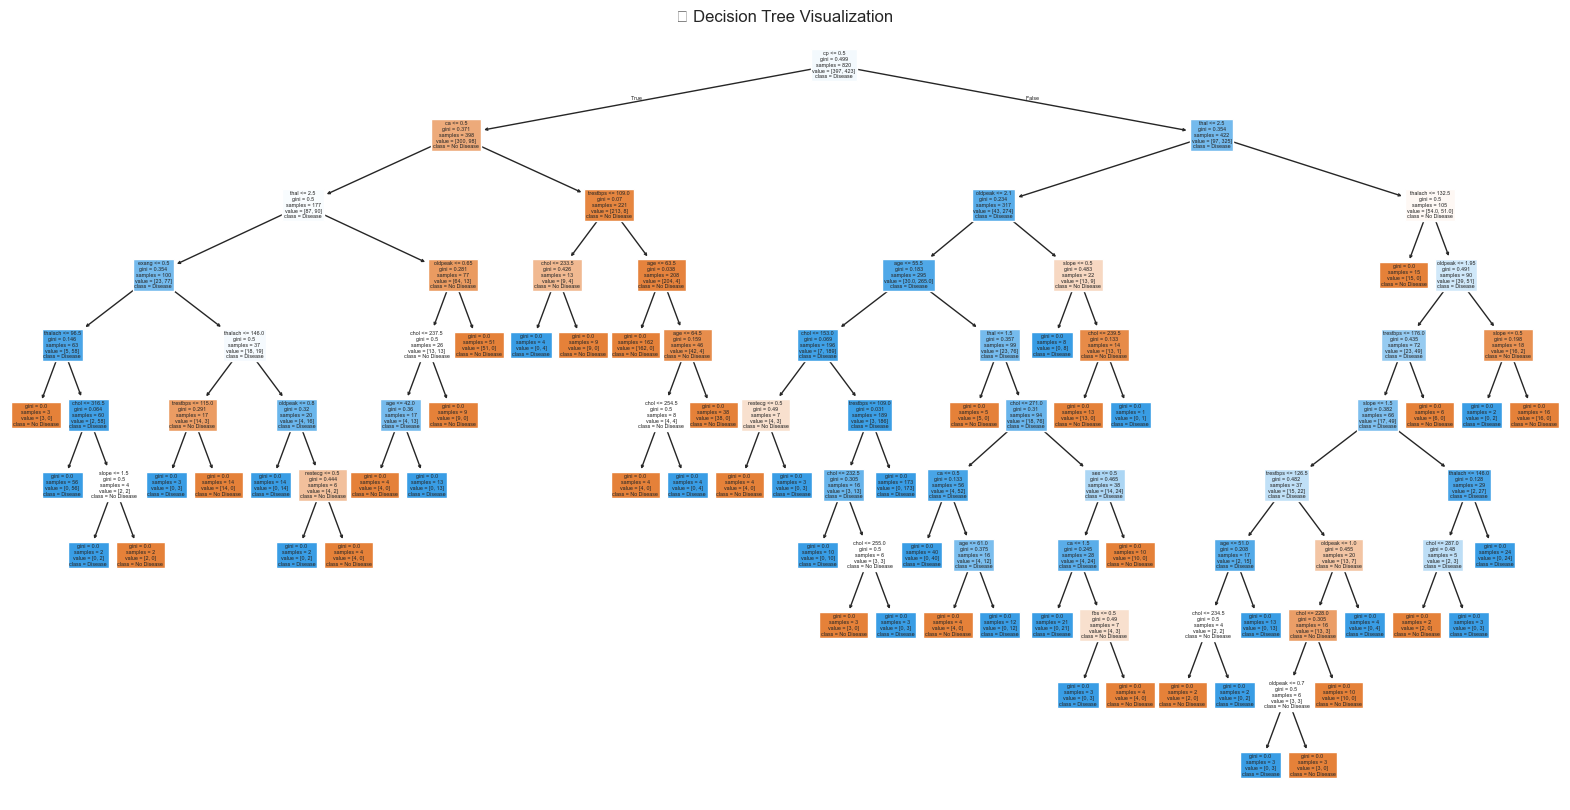

In [5]:
# Optional: Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("🌳 Decision Tree Visualization")
plt.show()

In [6]:
# Step 4: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("✅ Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred_rf))

✅ Random Forest Accuracy: 0.9853658536585366

📊 Confusion Matrix:
 [[102   0]
 [  3 100]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [7]:
# 5-Fold Cross-Validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("🔁 5-Fold Cross-Validation Scores:", cv_scores)
print("📊 Mean CV Accuracy:", round(cv_scores.mean(), 4))

🔁 5-Fold Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
📊 Mean CV Accuracy: 0.9971


In [9]:
import os
os.getcwd()

'C:\\Users\\jebin\\Elevate Labs'

In [11]:
import os

# Get current notebook directory
print("Current folder path:")
print(os.getcwd())

# Check if the file exists there
file_name = "task5_decision_tree_random_forest.ipynb"
print("\nFile exists:", os.path.exists(os.path.join(os.getcwd(), file_name)))

Current folder path:
C:\Users\jebin\Elevate Labs

File exists: True


In [12]:
import shutil

# Correct source and destination paths
source_path = r"C:\Users\jebin\Elevate Labs\task5_decision_tree_random_forest.ipynb"
destination_path = r"F:\Internships\Elevate Labs\Tasks\30 June\task5_decision_tree_random_forest.ipynb"

# Copy the file
shutil.copy2(source_path, destination_path)
print("✅ Notebook copied successfully to the 30 June folder!")

FileNotFoundError: [WinError 3] The system cannot find the path specified